# LW paper's figures

The figures to be used in the longwave paper are generated in this notebook.

In [200]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import pymongo
import matplotlib 
import matplotlib.pyplot as plt                                                                        
                                                                
from climatools.atm import *
from climatools.parameters import *
from climatools.dataset import *
from climatools.pymongo import *

import climatools.plot.plot as climaviz

from IPython import display                                                                                          
                                                                                                                     

In [184]:
output_notebook()

Loading BokehJS ...

In [185]:
client = pymongo.MongoClient('localhost', 27017)

In [186]:
COMMITNUMBER = '1013f91'

In [187]:
ATMPRO = dict(mls=294, saw=257, trp=300)

# Figures 2, 3, 4, 5, 6

## Figure 3

In [375]:
atmpro = 'mls'

In [395]:
atmcomp = AtmComposition.cliradlw_nongreys(onlygas='co2')

parm_cli = atmcomp.to_cliradparam(atmpro=atmpro, tsfc=ATMPRO[atmpro], commitnumber=COMMITNUMBER)
data_cli = parm_cli.modeldata_pymongo(collection=client.cliradnew.lw)

parms_lbl = atmcomp.to_lblnewparam(nv=1000, dv=.001, atmpro=atmpro, tsfc=ATMPRO[atmpro])
collec = client.lblnew.bestfit_lw
datas_lbl = [parm.modeldata_pymongo(collection=collec) for parm in parms_lbl]
data_lbl = sum(datas_lbl)

In [410]:
cool_crd = data_lbl.crd_cool['coolrg']
cool_cli = data_cli.wgt_cool['coolrg'].sel(i=1).sum('band')

cool_crd = cool_crd[cool_crd.pressure > .8e-2]
cool_cli = cool_cli[cool_cli.pressure > .8e-2]

cool_dif = cool_cli - cool_crd

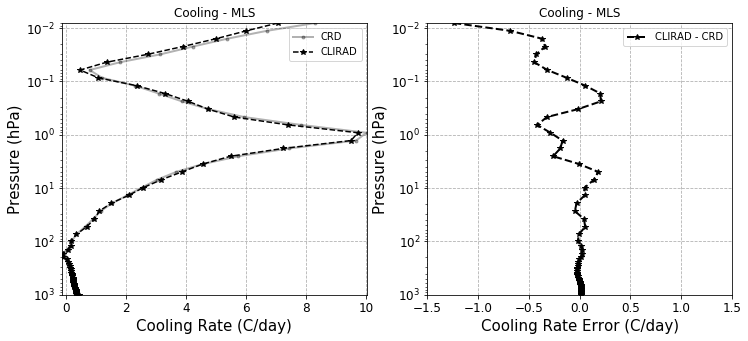

In [416]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

cool_crd.climaviz.plot(ax=axs[0], 
                       index_on_yaxis=True, 
                       yincrease=False,
                       yscale='log',
                       varlim_from_indexrange=(.8e-2, 1e3),
                       color='black', linestyle='-', marker='.',
                       linewidth=2, alpha=.3,
                       label='CRD')

cool_cli.climaviz.plot(ax=axs[0],
                       index_on_yaxis=True,
                       yincrease=False,
                       yscale='log',
                       varlim_from_indexrange=(.8e-2, 1e3),
                       color='black', linestyle='--', marker='*',
                       label='CLIRAD')

axs[0].grid(b=True, linestyle='--')
axs[0].set_title('Cooling - MLS')
axs[0].set_ylabel('Pressure (hPa)', fontsize=15)
axs[0].set_xlabel('Cooling Rate (C/day)', fontsize=15)
axs[0].get_xaxis().get_major_formatter().set_scientific(False)
axs[0].tick_params(labelsize='large')


cool_dif.climaviz.plot(ax=axs[1],
                       index_on_yaxis=True,
                       yincrease=False,
                       yscale='log',
                       varlim_from_indexrange=(.8e-2, 1e3),
                       color='black', linestyle='--', marker='*',
                       linewidth=2, alpha=1,
                       label='CLIRAD - CRD')

axs[1].grid(b=True, linestyle='--')
axs[1].set_title('Cooling - MLS')
axs[1].set_ylabel('Pressure (hPa)', fontsize=15)
axs[1].set_xlabel('Cooling Rate Error (C/day)', fontsize=15)
axs[1].get_xaxis().get_major_formatter().set_scientific(False)
axs[1].set_xlim(-1.5, 1.5)
axs[1].tick_params(labelsize='large')



fig.savefig('LWpaper_figure03.pdf')

# Figures 7, 8 and 9

In [188]:
atmpro = 'mls'

In [189]:
atmcomp = AtmComposition.cliradlw_nongreys()

parm_cli = atmcomp.to_cliradparam(atmpro=atmpro, tsfc=ATMPRO[atmpro], commitnumber=COMMITNUMBER)
data_cli = parm_cli.modeldata_pymongo(collection=client.cliradnew.lw)

parms_lbl = atmcomp.to_lblnewparam(nv=1000, dv=0.001, atmpro=atmpro, tsfc=ATMPRO[atmpro])
collecs = [client.lblnew.bestfit_lw if parm.model_name == 'lblnew-bestfit' else 
           client.lblnew.overlap_lw for parm in parms_lbl]
datas_lbl = [parm.modeldata_pymongo(collection=collec) for parm, collec in zip(parms_lbl, collecs)]
data_lbl = sum(datas_lbl)

In [371]:
cool_crd = data_lbl.crd_cool['coolrg']
cool_cli = data_cli.wgt_cool['coolrg'].sel(i=1).sum('band')

cool_crd = cool_crd[cool_crd.pressure > .8e-2]
cool_cli = cool_cli[cool_cli.pressure > .8e-2]

cool_dif = cool_cli - cool_crd

#cool_crd.loc[cool_crd.pressure < .5] = np.nan
#cool_cli.loc[cool_cli.pressure < .5] = np.nan

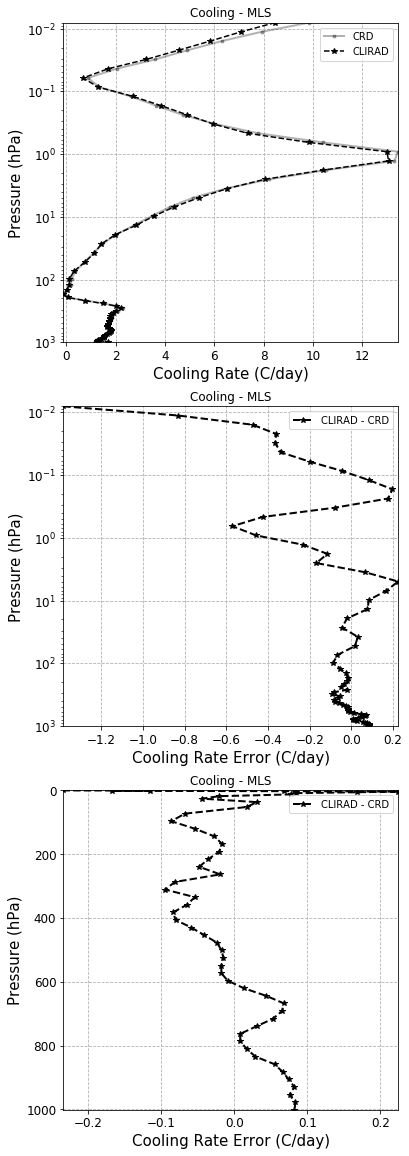

In [372]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(6, 20))

cool_crd.climaviz.plot(ax=axs[0], 
                       index_on_yaxis=True, 
                       yincrease=False,
                       yscale='log',
                       varlim_from_indexrange=(.8e-2, 1e3),
                       color='black', linestyle='-', marker='.',
                       linewidth=2, alpha=.3,
                       label='CRD')

cool_cli.climaviz.plot(ax=axs[0],
                       index_on_yaxis=True,
                       yincrease=False,
                       yscale='log',
                       varlim_from_indexrange=(.8e-2, 1e3),
                       color='black', linestyle='--', marker='*',
                       label='CLIRAD')

axs[0].grid(b=True, linestyle='--')
axs[0].set_title('Cooling - MLS')
axs[0].set_ylabel('Pressure (hPa)', fontsize=15)
axs[0].set_xlabel('Cooling Rate (C/day)', fontsize=15)
axs[0].get_xaxis().get_major_formatter().set_scientific(False)
axs[0].tick_params(labelsize='large')


cool_dif.climaviz.plot(ax=axs[1],
                       index_on_yaxis=True,
                       yincrease=False,
                       yscale='log',
                       varlim_from_indexrange=(.8e-2, 1e3),
                       color='black', linestyle='--', marker='*',
                       linewidth=2, alpha=1,
                       label='CLIRAD - CRD')

axs[1].grid(b=True, linestyle='--')
axs[1].set_title('Cooling - MLS')
axs[1].set_ylabel('Pressure (hPa)', fontsize=15)
axs[1].set_xlabel('Cooling Rate Error (C/day)', fontsize=15)
axs[1].get_xaxis().get_major_formatter().set_scientific(False)
axs[1].tick_params(labelsize='large')

cool_dif.loc[cool_dif.pressure < .5e0] = np.nan
cool_dif.climaviz.plot(ax=axs[2],
                       index_on_yaxis=True,
                       yincrease=False,
                       yscale='linear',
                       varlim_from_indexrange=(1, 1e3),
                       color='black', linestyle='--', marker='*',
                       linewidth=2, alpha=1,
                       label='CLIRAD - CRD')

axs[2].grid(b=True, linestyle='--')
axs[2].set_title('Cooling - MLS')
axs[2].set_ylabel('Pressure (hPa)', fontsize=15)
axs[2].set_xlabel('Cooling Rate Error (C/day)', fontsize=15)
axs[2].get_yaxis().get_major_formatter().set_scientific(False)
axs[2].get_xaxis().get_major_formatter().set_scientific(False)
axs[2].tick_params(labelsize='large')

fig.savefig('LWpaper_figure08.pdf')

# --

In [353]:
display.HTML('''<script>                                                                                             
code_show=true;                                                                                                      
function code_toggle() {                                                                                             
 if (code_show){                                                                                                     
 $('div.input').hide();                                                                                              
 } else {                                                                                                            
 $('div.input').show();                                                                                              
 }                                                                                                                   
 code_show = !code_show                                                                                              
}                                                                                                                    
$( document ).ready(code_toggle);                                                                                    
</script>                                                                                                            
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></for\
m>''')